# Exercício de fixação XI / Desafio V - Naive Bayes e fundamentos de PLN (Processamento de Linguagem Natural) com Python

Nesta demo utilizaremos o Naive Bayes para criar um modelo para o clássico problema de análise de sentimento em linguagem escrita.

In [ ]:
# Importando nossas bibliotecas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  print('Usuario fez upload do arquivo "{name}" de tamanho {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Restaurant_Reviews.tsv to Restaurant_Reviews (1).tsv
Usuario fez upload do arquivo "Restaurant_Reviews.tsv" de tamanho 61332 bytes


In [ ]:
# Importando nosso dataset

df = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df['lenght'] = df['Review'].apply(len)
df.head()

,Review,Liked,lenght
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


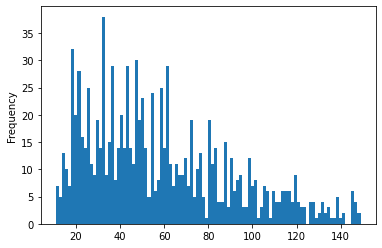

In [ ]:
df['lenght'].plot(bins=100, kind='hist')

In [ ]:
df.lenght.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: lenght, dtype: float64

In [ ]:
df[df['lenght']==11]['Review'].iloc[0]

'DELICIOUS!!'

In [ ]:
df[df['lenght']==149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b39da3310>,
      dtype=object)

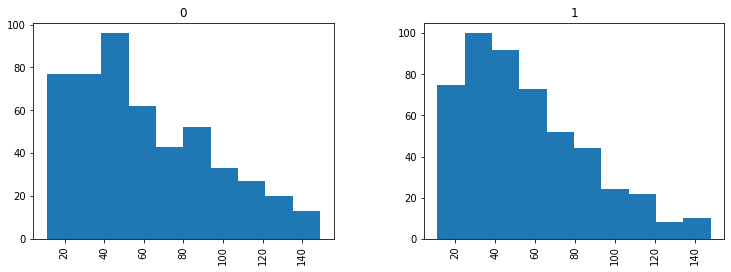

In [ ]:
df.hist(column='lenght', by='Liked',figsize=(12,4))

In [ ]:
# Limpando nossos textos

import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Stemming e Lemmatizing (Stemming - redução de palavras flexionadas / Lemmatizing - agrupando as formas flexionadas de uma palavra para que possam ser analisadas como um só item)

ps = nltk.stem.PorterStemmer()
lemma = nltk.stem.WordNetLemmatizer()
corpus = []

for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    review = [lemma.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Criando BoW via TF-IDF (Bag of Words - Ref. https://machinelearningmastery.com/gentle-introduction-bag-words-model/)

from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(ngram_range=(1,2))

x = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [ ]:
# Ajuste de nosso Baive Bayes para os dados de treinamento

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [ ]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
# Predicao para dados de teste

from sklearn.metrics import accuracy_score

y_pred = mnb.predict(x_test)
accuracy1 = accuracy_score(y_test, y_pred)*100
print("Acuracia: {}".format(accuracy1))

Acuracia: 79.5


In [ ]:
# Via Matriz de Confusão

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[76, 20],
       [21, 83]])

In [ ]:
# Via Classification Report

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.79      0.79        96
           1       0.81      0.80      0.80       104

    accuracy                           0.80       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.80      0.80      0.80       200



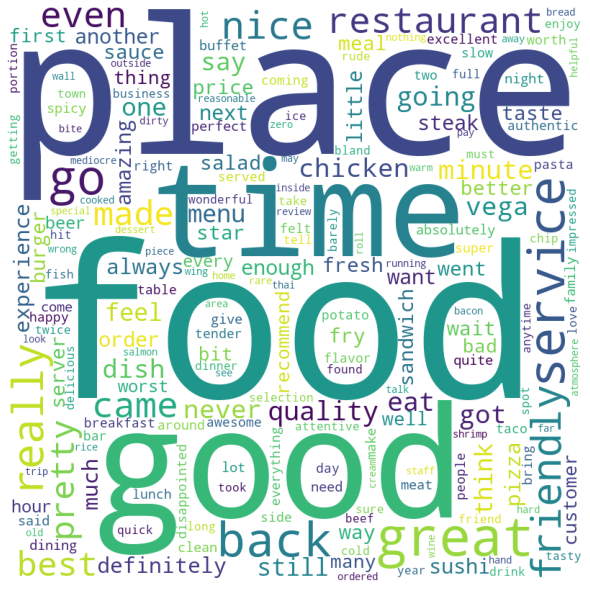

In [ ]:
# Gerando nuvem de palavras global

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size= 12).generate("".join(corpus))

plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

## **Desafio V**

Nas células a seguir, tente construir nuvens de palavras para cada uma de nossas classes bem como execute as etapas para criação de modelo se utilizando de alg. KNN ou quaisquer outros de sua preferência.

###**Algoritmo KNN**

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# Procurando um K ideal
def trainKtimes(n, Xtrain, Ytrain, Xtest, Ytest):
  n = 1 if (n < 1) else n
  n = n + 1

  error_rate = []
  
  for k in range(1, n):
    knn = KNeighborsClassifier(n_neighbors=k, p=2, weights='uniform')
    knn.fit(Xtrain,Ytrain)
    pred_i = knn.predict(Xtest)
    error_rate.append(np.mean(pred_i != Ytest))

    knn_model = knn.fit(Xtrain, Ytrain)
    pred = knn_model.predict(Xtest)

  return error_rate  

error_rate=trainKtimes(40, x_train, y_train, x_test, y_test)

Text(0, 0.5, 'Taxa de Erro')

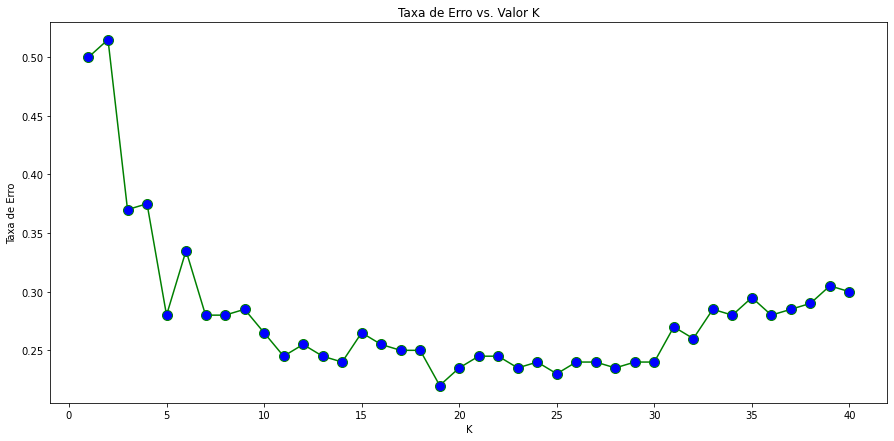

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(range(1,41),error_rate,color='green', marker='.', markerfacecolor='blue', markersize=20)
plt.title('Taxa de Erro vs. Valor K')
plt.xlabel('K')
plt.ylabel('Taxa de Erro')

Parece que um K bom está em torno de 19

In [ ]:
# Treinando o KNN
knn = KNeighborsClassifier(n_neighbors=19, p=2, weights='uniform')
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [ ]:
# Predicao para dados de teste (KNN)
from sklearn.metrics import accuracy_score

pred_y = knn.predict(x_test)

accuracy1 = accuracy_score(y_test, pred_y)*100
print("Acuracia: {}".format(accuracy1))


Acuracia: 78.0


In [ ]:
# Via Matriz de Confusão (KNN)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_y)
cm

array([[71, 25],
       [19, 85]])

In [ ]:
# Via Classification Report (KNN)
from sklearn.metrics import classification_report

report = classification_report(y_test, pred_y)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.74      0.76        96
           1       0.77      0.82      0.79       104

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



**Com essa configuração de K, o KNN ficou bem próximo da acurária do Naive Bayes, mas ainda abaixo.**

## **Nuvem de palavras**

In [124]:
# Filtrando por conceitos negativos e expressado com menos de 30 caracteres
dfnegshort = df[(df['Liked'] == 0) & (df.Review.str.len() <= 30)].reset_index()

corpus = []

for i in range(0, len(dfnegshort)):
    review = re.sub('[^a-zA-Z]', ' ', dfnegshort['Review'][i])
    review = review.lower()
    review = review.split()
    review = [lemma.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

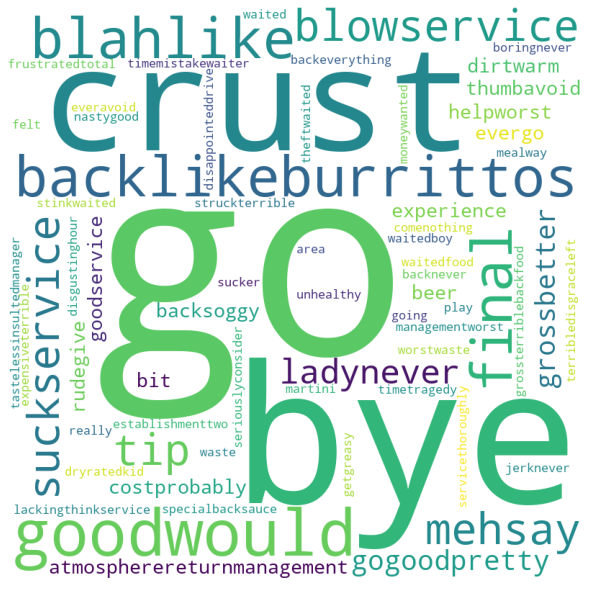

In [125]:
# Gerando nuvem de palavras global

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size= 12).generate("".join(corpus))

plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [128]:
# Filtrando por conceitos positivos e expressado com menos de 30 caracteres
dfposshort = df[(df['Liked'] == 1) & (df.Review.str.len() <= 30)].reset_index()

corpus = []

for i in range(0, len(dfposshort)):
    review = re.sub('[^a-zA-Z]', ' ', dfposshort['Review'][i])
    review = review.lower()
    review = review.split()
    review = [lemma.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

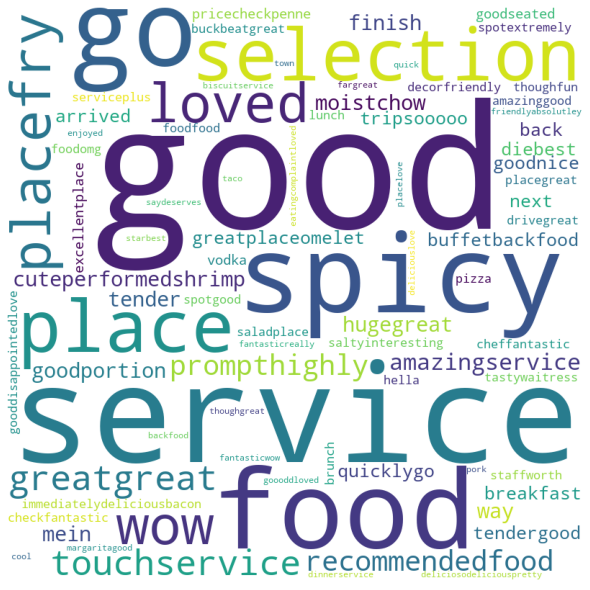

In [129]:
# Gerando nuvem de palavras global

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size= 12).generate("".join(corpus))

plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()